## Observations and Insights

## Dependencies and starter code

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
# Used right join to append mouse metadata into the study result dataframe
merged_df = pd.merge(mouse_metadata,study_results,on='Mouse ID', how='right')

## Summary statistics

In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame([merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),
                           merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(), 
                           merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(), 
                           merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),
                           merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()], 
                           index=['Mean', 'Median', 'Std. dev', 'Variance', 'SEM'])
summary_df

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.322552,40.216745,54.233149,53.236507
Median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.854632,40.673236,52.431737,51.818479
Std. dev,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.507770,4.846308,7.710419,6.966589
Variance,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,42.351070,23.486704,59.450562,48.533355
SEM,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.512884,0.320955,0.573111,0.516398


## Bar plots

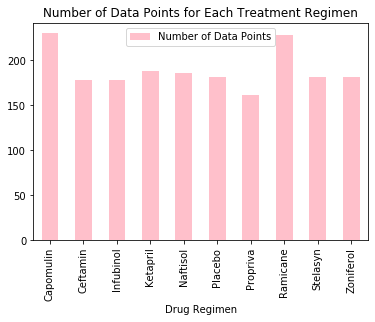

In [90]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_count = merged_df.groupby('Drug Regimen')['Mouse ID'].count()
regimen_count_df = pd.DataFrame(regimen_count)
regimen_count_df['Number of Data Points'] = regimen_count_df['Mouse ID']
del regimen_count_df['Mouse ID']
regimen_count_df.plot.bar(color = 'pink', title = 'Number of Data Points for Each Treatment Regimen')

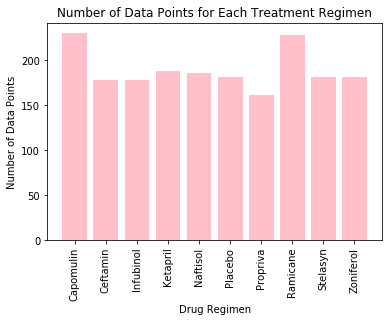

In [91]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(regimen_count_df.index.values,regimen_count_df['Number of Data Points'], color = 'pink')
plt.xticks(rotation='90')
plt.title('Number of Data Points for Each Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

## Pie plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a21c12e50>],
      dtype=object)

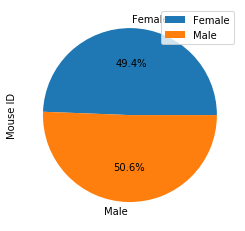

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_panda_count = merged_df.groupby('Sex')['Mouse ID'].count()
sex_panda_count_df = pd.DataFrame(sex_panda_count)
sex_panda_count_df.plot.pie(subplots=True,autopct='%1.1f%%')

/Users/michaelmaimoni/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


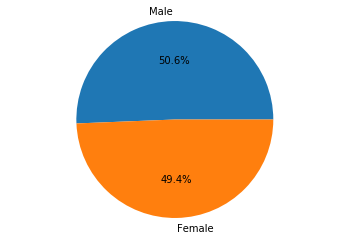

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ('Male', 'Female')
sex_count = merged_df.groupby('Sex')['Tumor Volume (mm3)'].mean()
sex_count_df = pd.DataFrame(sex_count)
plt.pie(sex_count_df, labels=labels,autopct='%1.1f%%')
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen